# Ball Image Classification by VGG16
The classification example is implemeted by VGG16.

Here is a link of dataset: https://www.kaggle.com/gpiosenka/balls-image-classification

## Content

<ul>
  <li><a href="#part1">1. Import libraries</a></li>
  <li><a href="#part2">2. Define a folder path of test, train and valid and Image Size</a></li>
  <li><a href="#part3">3. Create ImageGenerator for train, test and valid </a></li>
  <li><a href="#part4">4. Create VGG16 Model </a></li>  
  <li><a href="#part5">5. Compile and Fit VGG16 Model </a></li>
  <li><a href="#part6">6. Create a Model Loss Graph </a></li>
  <li><a href="#part7">7. Create a Model Accuracy Graph </a></li>
  <li><a href="#part8">8. Load VGG16 Model as h5 extension file </a></li>
  <li><a href="#part9">9. Define y_test and y_pred values </a></li>
  <li><a href="#part10">10. Draw a confusion matrix through Seaborn library </a></li>
  <li><a href="#part11">11. Show some images to determine if actual value is similar to its predicted value </a></li>  
</ul>

<a id='part1'></a>
## 1 ) Import libraries

In [1]:
#import libraries
import tensorflow 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

<a id='part2'></a>
## 2 ) Define a folder path of test, train and valid and Image Size

In [2]:
TRAIN_PATH = "train"
TEST_PATH = "test"
VALID_PATH = "valid"

IMAGE_SIZE = 224

<a id='part3'></a>
## 3 ) Create ImageGenerator for train, test and valid

In [3]:
#Creating generator for Training DataSet
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=64,
        class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(
        VALID_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical')

Found 2860 images belonging to 24 classes.
Found 120 images belonging to 24 classes.
Found 120 images belonging to 24 classes.


<a id='part4'></a>
## 4 ) Create VGG16 Model

In [20]:
base_model=VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))

#freeze the base model
base_model.trainable = False

model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.35))
model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.35))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.35))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.35))
model.add(Dense(24,activation='softmax')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 24)               

<a id='part5'></a>
## 5 ) Compile and Fit VGG16 Model

In [21]:
class myCallback(Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.97):
                print("\nReached 97% accuracy so cancelling training!")
                self.model.stop_training = True


model.compile(optimizer=Adam(1e-4), # 0.0001
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = myCallback()

history=model.fit(train_generator,
                  epochs=5,
                  steps_per_epoch = len(train_generator),
                  validation_data=val_generator
                  #callbacks=[callbacks],
                 )

model.save('model_file.h5')

Epoch 1/5
45/45 [==============================] - 348s 8s/step - loss: 4.3137 - accuracy: 0.2873 - val_loss: 0.6639 - val_accuracy: 0.8417
Epoch 2/5
45/45 [==============================] - 352s 8s/step - loss: 0.4186 - accuracy: 0.8904 - val_loss: 0.3040 - val_accuracy: 0.9083
Epoch 3/5
45/45 [==============================] - 341s 8s/step - loss: 0.1435 - accuracy: 0.9597 - val_loss: 0.3546 - val_accuracy: 0.9167
Epoch 4/5
45/45 [==============================] - 381s 8s/step - loss: 0.0833 - accuracy: 0.9766 - val_loss: 0.3267 - val_accuracy: 0.9333
Epoch 5/5
45/45 [==============================] - 452s 10s/step - loss: 0.0326 - accuracy: 0.9954 - val_loss: 0.2488 - val_accuracy: 0.9417


<a id='part6'></a>
## 6 ) Create a Model Loss Graph

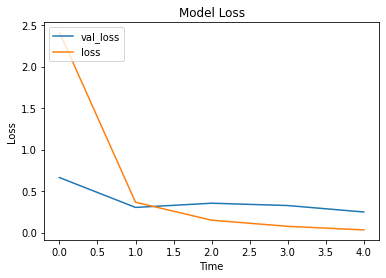

In [22]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

<a id='part7'></a>
## 7 ) Create a Model Accuracy Graph

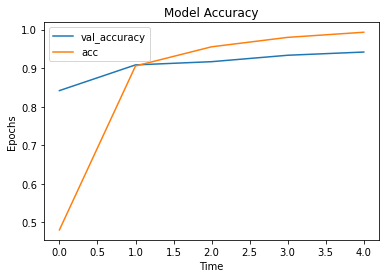

In [23]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

<a id='part8'></a>
## 8 ) Load VGG16 Model as h5 extension file 

In [4]:
model = load_model('model_file.h5')

<a id='part9'></a>
## 9 ) Define y_test and y_pred values 

In [5]:
n_batches = len(test_generator)

# Predict the label of the test_images
y_test = np.concatenate([np.argmax(test_generator[i][1], axis = 1) for i in range(n_batches)])
y_pred = np.argmax(model.predict_generator(generator=test_generator, steps = n_batches), axis=1)


C:\Users\Noyan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
<a id='part10'></a>
## 10 ) Define the accuracy of test set

In [6]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 89.17%


<a id='part10'></a>
## 10 ) Draw a confusion matrix through Seaborn library

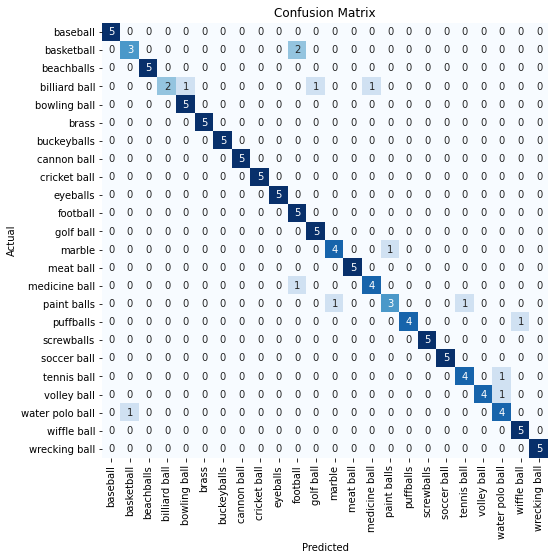

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=np.arange(24))

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(24) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(24) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<a id='part11'></a>
## 11 ) Show some images to determine if actual value is similar to its predicted value

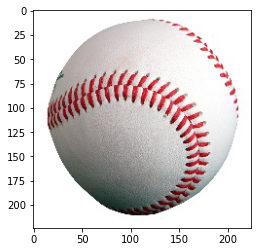

Actual: baseball
Predicted: baseball


In [11]:
from keras_preprocessing import image
image_path="test/baseball/1.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

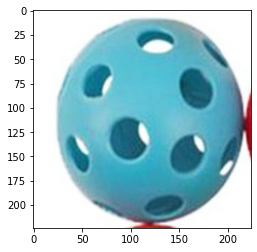

Actual: wiffle ball
Predicted: wiffle ball


In [12]:
from keras_preprocessing import image
image_path="test/wiffle ball/1.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

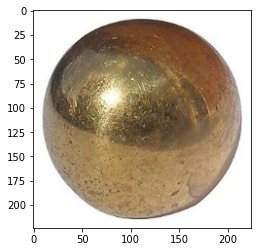

Actual: brass
Predicted: brass


In [13]:
from keras_preprocessing import image
image_path="test/brass/1.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])